## Importing Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score, f1_score,
    precision_score, recall_score, roc_auc_score, balanced_accuracy_score
)
import pickle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


## Reading Data

In [29]:
df = pd.read_csv('K:\DEPI\Final Project\Data\Cleaned Final.csv')
df


,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,0,8.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Never smoked,Not at all (right now),0,"White only, Non-Hispanic",Elderly (70+),1.702775,83.182065,28.566,0,0,1,0,1.0,No
1,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,0,6.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Never smoked,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",Elderly (70+),1.600000,68.040000,26.570,0,0,0,0,0.0,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,1,5.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Never smoked,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",Seniors (55-69),1.570000,63.500000,25.610,0,0,0,0,1.0,No
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,1,7.0,0.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,1,"White only, Non-Hispanic",Seniors (55-69),1.650000,63.500000,23.300,0,0,1,1,0.0,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,1,9.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Never smoked,Never used e-cigarettes in my entire life,1,"White only, Non-Hispanic",Early Middle Age (35-44),1.570000,53.980000,21.770,1,0,0,1,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394493,Virgin Islands,Female,Good,0.0,3.0,Within past 2 years (1 year but less than 2 ye...,1,6.0,0.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,Never smoked,Never used e-cigarettes in my entire life,1,"Black only, Non-Hispanic",Young Adults (18-34),1.650000,69.850000,25.630,1,1,0,0,0.0,No
394494,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,1,7.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Never smoked,Never used e-cigarettes in my entire life,0,"Black only, Non-Hispanic",Late Middle Age (45-54),1.700000,83.010000,28.660,0,1,1,0,1.0,No
394495,Virgin Islands,Female,Poor,30.0,30.0,5 or more years ago,0,5.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Current smoker - now smokes every day,Use them some days,0,"White only, Non-Hispanic",Seniors (55-69),1.700000,49.900000,17.230,1,0,0,0,0.0,No
394496,Virgin Islands,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,0,5.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Never smoked,Never used e-cigarettes in my entire life,1,"Black only, Non-Hispanic",Elderly (70+),1.830000,108.860000,32.550,0,1,1,1,0.0,No


In [30]:
pd.set_option('display.max_columns' , None)

## Encoding

In [31]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories=[['Poor','Fair','Good' , 'Very good' , 'Excellent' ]])
df['GeneralHealth'] = oe.fit_transform(df[['GeneralHealth']])

In [32]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [33]:
df['Sex'].value_counts()

Sex
0    208932
1    185566
Name: count, dtype: int64

In [34]:
le = LabelEncoder()
cols = ['State', 'RaceEthnicityCategory' , 'LastCheckupTime' , 'HighRiskLastYear']   # الأعمدة الكاتيجوريكال

for c in cols:
    df[c] = le.fit_transform(df[c])

In [35]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories=[['Young Adults (18-34)' , 'Early Middle Age (35-44)' , 'Late Middle Age (45-54)' , 'Seniors (55-69)','Elderly (70+)']])
df['AgeCategory'] = oe.fit_transform(df[['AgeCategory']])

In [36]:
df = pd.get_dummies(df, columns=['SmokerStatus', 'ECigaretteUsage'], drop_first=True)

In [37]:
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'ChestScan',
       'RaceEthnicityCategory', 'AgeCategory', 'HeightInMeters',
       'WeightInKilograms', 'BMI', 'AlcoholDrinkers', 'HIVTesting',
       'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear',
       'SmokerStatus_Current smoker - now smokes some days',
       'SmokerStatus_Former smoker', 'SmokerStatus_Never smoked',
       'ECigaretteUsage_Not at all (right now)',
       'ECigaretteUsage_Use them every day',
       'ECigaretteUsage_Use them s

# Rebalancing Data (Under Sampling)

under-sampling is clearly not the most desirable solution, since it removes a significant amount of information and may discard valuable signal, but it was the approach that allowed the model to actually start generalizing. 
This is largely due to the strong non-linearity between features and the highly imbalanced nature of the target.
 Moreover, the features in the dataset are only weakly correlated with each other and with the target, which itself represents a very broad outcome that is not solely determined by lifestyle or medical indicators, but also by social and personal factors that are impossible to capture in such datasets, Even after under-sampling, a large and useful portion of the data was still preserved

In [38]:

df_majority = df[df['HadDepressiveDisorder'] == 0]
df_minority = df[df['HadDepressiveDisorder'] == 1]

# النسبة المطلوبة
ratio = 1
n_majority_needed = len(df_minority) * ratio

# عينة من majority بالنسبة الجديدة
df_majority_sampled = df_majority.sample(n_majority_needed, random_state=42)

# دمج
df_balanced = pd.concat([df_majority_sampled, df_minority])

# Shuffle
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [39]:
df_balanced.shape

(165788, 43)

In [40]:
df_balanced

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,SmokerStatus_Current smoker - now smokes some days,SmokerStatus_Former smoker,SmokerStatus_Never smoked,ECigaretteUsage_Not at all (right now),ECigaretteUsage_Use them every day,ECigaretteUsage_Use them some days
0,5,0,4.0,0.0,4.0,3,1,9.0,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,3.0,1.68,74.84,26.63,0,0,1,1,1.0,0,False,True,False,False,False,False
1,6,0,3.0,0.0,3.0,2,1,6.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,1.0,1.65,58.97,21.63,1,1,1,1,1.0,0,False,False,True,True,False,False
2,30,1,1.0,5.0,0.0,3,1,12.0,1.0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,0,0,1,4,4.0,1.78,77.11,24.39,1,0,1,0,1.0,0,False,False,False,False,False,False
3,12,1,1.0,7.0,4.0,3,1,8.0,1.0,0,0,1,0,0,0,1,0,1,0,1,1,0,1,0,0,1,3,4.0,1.70,62.14,21.46,1,0,1,0,1.0,0,False,True,False,False,True,False
4,38,1,3.0,0.0,2.0,3,1,7.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,4,2.0,1.88,113.40,32.10,1,0,0,0,1.0,0,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165783,24,1,0.0,29.0,29.0,3,0,10.0,0.0,0,0,0,0,0,0,1,1,1,1,0,0,0,1,0,0,1,4,2.0,1.88,172.37,48.79,0,0,0,0,1.0,0,False,True,False,True,False,False
165784,16,0,2.0,25.0,3.0,3,1,7.0,1.0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,4,4.0,1.47,74.84,34.48,1,0,0,1,1.0,0,False,True,False,False,False,False
165785,33,0,1.0,0.0,8.0,3,1,5.0,1.0,0,0,0,1,0,0,1,0,1,1,0,1,1,1,1,1,1,0,3.0,1.75,97.52,31.75,1,1,0,0,0.0,0,False,False,True,False,False,False
165786,45,0,2.0,4.0,25.0,3,1,4.0,1.0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,4,3.0,1.60,61.23,23.91,0,0,0,0,1.0,0,False,False,False,True,False,False


# Modeling Using XGBoost

In [41]:
drop_list = ['State' ,'LastCheckupTime' , 'RemovedTeeth' , 'HadAngina' , 'HadStroke' , 'HadAsthma' , 'HadSkinCancer' , 'HadCOPD' , 'HadKidneyDisease', 'HadArthritis' , 'ChestScan' , 'BMI' , 
             'HIVTesting' , 'FluVaxLast12' , 'PneumoVaxEver' , 'TetanusLast10Tdap'  , 'HadDepressiveDisorder' 
              	  , 'ECigaretteUsage_Use them some days' , 'ECigaretteUsage_Use them every day' ,'ECigaretteUsage_Not at all (right now)' 
                   , 'SmokerStatus_Never smoked' , 'SmokerStatus_Former smoker' , 'HadHeartAttack' , 'HighRiskLastYear']
X = df_balanced.drop(columns=drop_list)

In [42]:
y = df_balanced['HadDepressiveDisorder']
y.shape

(165788,)

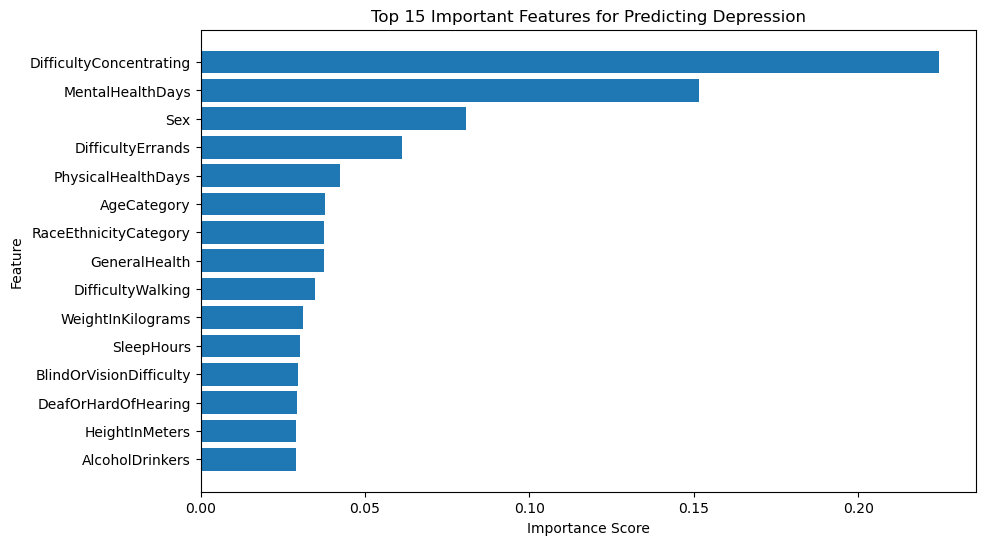

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
model = XGBClassifier(random_state=40 , n_estimators = 3200 , max_depth= 9 , n_jobs=-1 , colsample_bytree = 0.7 , subsample = 0.8  ,
                       gamma = 0.5 , learning_rate = 0.03 , reg_alpha = 0.5 , reg_lambda = 0.7 ) 

#model = XGBClassifier(random_state=40 , n_estimators = 3200 , max_depth= 9 , n_jobs=-1 , colsample_bytree = 0.7 , subsample = 0.8  ,    gamma = 0.6 , learning_rate = 0.05 , reg_alpha = 0.5 , reg_lambda = 0.7 ) 


model.fit(X_train, y_train)

importances = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(feature_importance['Feature'][:15], feature_importance['Importance'][:15])
plt.gca().invert_yaxis()
plt.title('Top 15 Important Features for Predicting Depression')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [24]:
y_train_pred = model.predict(X_train)


In [25]:
print(classification_report(y_train , y_train_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88     58002
           1       0.90      0.84      0.87     58049

    accuracy                           0.87    116051
   macro avg       0.87      0.87      0.87    116051
weighted avg       0.87      0.87      0.87    116051



In [26]:
y_pred = model.predict(X_test)
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.73      0.76      0.74     24892
           1       0.75      0.72      0.73     24845

    accuracy                           0.74     49737
   macro avg       0.74      0.74      0.74     49737
weighted avg       0.74      0.74      0.74     49737



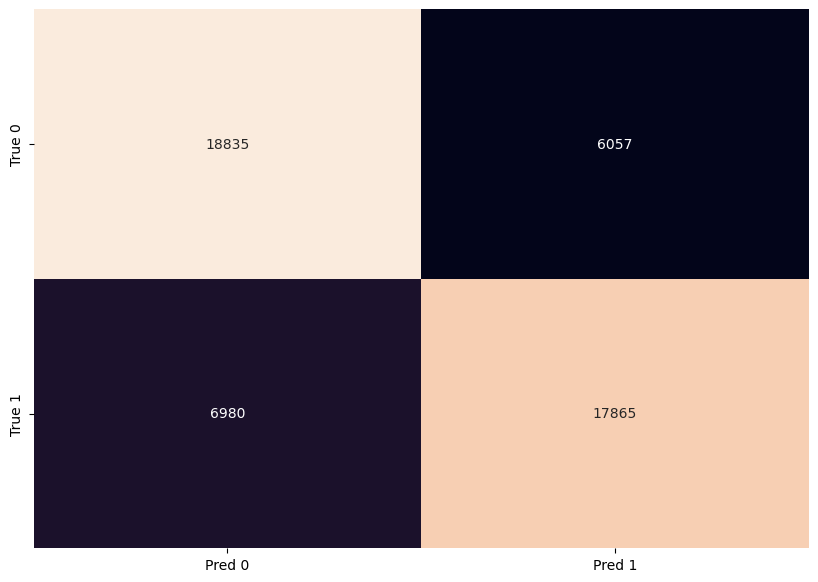

In [78]:

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
                xticklabels=["Pred 0","Pred 1"],
                yticklabels=["True 0","True 1"])
plt.show()

## HyperParams Tuning for XGBoost

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

params = {
    "learning_rate": [0.05, 0.1, 0.2],
    "subsample": [0.7, 0.9],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 0.3, 0.5],
    "reg_alpha": [0, 0.5, 1],
    "reg_lambda": [1, 2, 5]
}

xgb = XGBClassifier(
    random_state=40,
    n_jobs=-1,
    eval_metric="logloss"  
)

grid = GridSearchCV(
    estimator=xgb,
    param_grid=params,
    cv=3,
    scoring="f1",  
    verbose=2
)

grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_score_)

## Cross Validatation For XGBoost

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

from sklearn.model_selection import cross_val_score, KFold
from xgboost import XGBClassifier
import numpy as np

model = XGBClassifier(
    random_state=40,
    n_estimators = 3200,
    max_depth=9,
    n_jobs=-1,
    colsample_bytree=0.7,
    subsample=0.8,
    gamma=0.5,
    learning_rate=0.03,
    reg_alpha=0.5,
    reg_lambda=0.7
)

kfold = KFold(n_splits=5, shuffle=True, random_state=40)


scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1')

print("Scores for each fold:", scores)
print("Mean F1:", round(scores.mean(),4))
print("STD F1:", round(scores.std(),4))


Scores for each fold: [0.72956694 0.73319559 0.7306767  0.73793615 0.73508749]
Mean F1: 0.7333
STD F1: 0.003


## Neural Network Trial

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


model_nn = keras.Sequential([
    layers.Dense(256, activation="relu", input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(128, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(64, activation="relu"),
    layers.Dropout(0.2),

    layers.Dense(1, activation="linear")
])

model_nn.compile(
    optimizer="adam",
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=["accuracy","AUC","Precision","Recall"]
)


history = model_nn.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=40,
    batch_size=256,
    verbose=1
)


results = model_nn.evaluate(X_test, y_test, verbose=0)
print(dict(zip(model_nn.metrics_names, results)))


Epoch 1/40


c:\Users\karim\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - AUC: 0.7756 - Precision: 0.7328 - Recall: 0.6821 - accuracy: 0.7164 - loss: 0.5763 - val_AUC: 0.8151 - val_Precision: 0.7404 - val_Recall: 0.7428 - val_accuracy: 0.7417 - val_loss: 0.5390
Epoch 2/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.8040 - Precision: 0.7508 - Recall: 0.7129 - accuracy: 0.7379 - loss: 0.5400 - val_AUC: 0.8167 - val_Precision: 0.7196 - val_Recall: 0.7805 - val_accuracy: 0.7387 - val_loss: 0.5359
Epoch 3/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - AUC: 0.8067 - Precision: 0.7554 - Recall: 0.7151 - accuracy: 0.7415 - loss: 0.5365 - val_AUC: 0.8171 - val_Precision: 0.7235 - val_Recall: 0.7803 - val_accuracy: 0.7416 - val_loss: 0.5412
Epoch 4/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - AUC: 0.8091 - Precision: 0.7536 - Recall: 0.7225 - accuracy: 0.7429 - loss: 0.5333 - val_AUC: 0.8182 - val_Precision: 0.7134 - val_Recall: 0.7981 - val_accuracy: 0.7393 - val_loss: 0.5358
Epoch 5/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 

#### Neural Network Wasn't much better than XGboost

## CatBoost Model

In [52]:

from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score , f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

CatModel = CatBoostClassifier(
    iterations=3000,
    learning_rate=0.03,
    depth=8,
    loss_function='Logloss',
    eval_metric='F1',
    verbose=200,
    random_state=42,
    l2_leaf_reg=3,
    bagging_temperature=0.8,
    border_count=128
)

CatModel.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    use_best_model=True
)

y_pred_proba = CatModel.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba >= 0.5).astype(int)

f1 = f1_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Accuracy:", round(acc,4))
print("F1:", round(f1,4))

print("----------------------")
print(classification_report(y_test, y_pred, digits=4))


0:	learn: 0.7422725	test: 0.7395617	best: 0.7395617 (0)	total: 21.8ms	remaining: 1m 5s
200:	learn: 0.7506422	test: 0.7428947	best: 0.7429710 (197)	total: 3.3s	remaining: 45.9s
400:	learn: 0.7557238	test: 0.7443120	best: 0.7443578 (397)	total: 6.52s	remaining: 42.3s
600:	learn: 0.7598147	test: 0.7439831	best: 0.7446399 (461)	total: 9.52s	remaining: 38s
800:	learn: 0.7634040	test: 0.7435173	best: 0.7446399 (461)	total: 12.6s	remaining: 34.5s
1000:	learn: 0.7667297	test: 0.7442508	best: 0.7446399 (461)	total: 15.6s	remaining: 31.1s
1200:	learn: 0.7702065	test: 0.7439042	best: 0.7446399 (461)	total: 18.7s	remaining: 28s
1400:	learn: 0.7733160	test: 0.7435404	best: 0.7446399 (461)	total: 22.2s	remaining: 25.4s
1600:	learn: 0.7761529	test: 0.7435462	best: 0.7446399 (461)	total: 26s	remaining: 22.8s
1800:	learn: 0.7791497	test: 0.7432549	best: 0.7446399 (461)	total: 29.8s	remaining: 19.8s
2000:	learn: 0.7818804	test: 0.7432164	best: 0.7446399 (461)	total: 33.1s	remaining: 16.5s
2200:	learn: 0

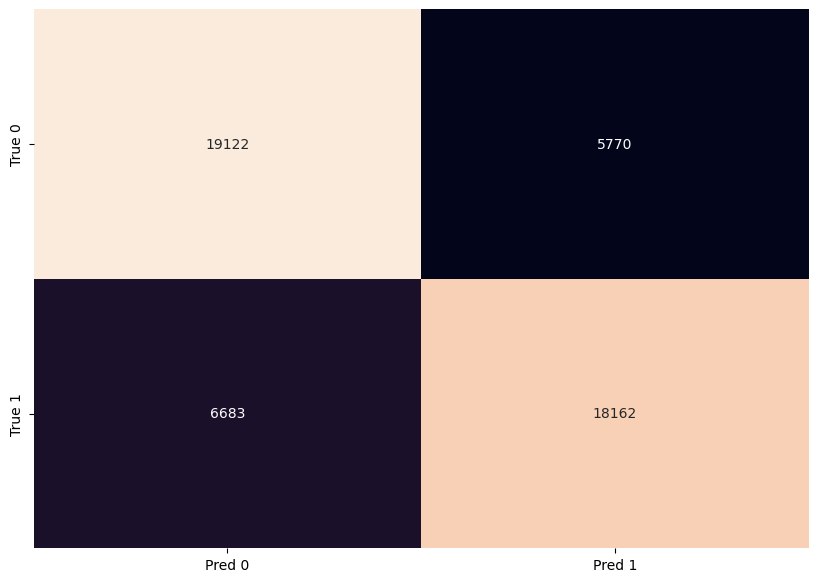

In [48]:

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
                xticklabels=["Pred 0","Pred 1"],
                yticklabels=["True 0","True 1"])
plt.show()

#### CatBoost Worked slightly better than XGboost And Neural Network

## HyperParams Tuning for CatBoost

In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, f1_score, roc_auc_score, accuracy_score, precision_score, recall_score
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)


cat_model = CatBoostClassifier(
    loss_function='Logloss',
    eval_metric='AUC',
    random_state=42,
    verbose=0
)

param_grid = {
    'depth': [8, 10],
    'learning_rate': [0.03, 0.07],
    'l2_leaf_reg': [1, 3, 5],
    'iterations': [1500 , 2000],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=cat_model,
    param_grid=param_grid,
    scoring='f1',        
    cv=3,              
    n_jobs=-1           
)


grid_search.fit(X_train, y_train)

print("Best Parameters found:")
print(grid_search.best_params_)

best_cat = grid_search.best_estimator_
y_pred = best_cat.predict(X_test)
y_pred_proba = best_cat.predict_proba(X_test)[:, 1]

print("\n Evaluation on Test Data:")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("Precision:", round(precision_score(y_test, y_pred), 4))
print("Recall:", round(recall_score(y_test, y_pred), 4))
print("F1:", round(f1_score(y_test, y_pred), 4))
print("AUC:", round(roc_auc_score(y_test, y_pred_proba), 4))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))


✅ Best Parameters found:
{'depth': 8, 'iterations': 1500, 'l2_leaf_reg': 5, 'learning_rate': 0.03, 'subsample': 0.8}

🔹 Evaluation on Test Data:
Accuracy: 0.7483
Precision: 0.7567
Recall: 0.7311
F1: 0.7437
AUC: 0.8208

Classification Report:
              precision    recall  f1-score   support

           0     0.7404    0.7654    0.7527     24892
           1     0.7567    0.7311    0.7437     24845

    accuracy                         0.7483     49737
   macro avg     0.7486    0.7483    0.7482     49737
weighted avg     0.7486    0.7483    0.7482     49737



### Among all the models we tested with every possible configuration and adjustment, CatBoost achieved the best performance.

# Saving pkl. File

In [53]:
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)